Q.4.  (i) Write python from scratch for 2D DCT   transform  on the following matrix:
       <br> (a)  f(m.n) = [ 90, 100 ;
                       100,  175]  
       <br> (b) f(m.n) = [  10, 20, 30;
                       40  50  60;
                       70  80, 90; 
                       100,110,120;
                       130 140, 150]
       <br>   and also comment on energy compaction property  of DCT.
       <br> (c)   f(m.n)= monalisa.tif 

(ii) Write python from scratch for 2D IDCT   transform  and reconstruct f(m,n) from  part(i)

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
import numpy as np

#### Helper for DCT/IDCT

In [3]:
def A(i,Z):
    if i:
        return np.sqrt(2/Z)
    else:
        return np.sqrt(1/Z)

#### DCT

In [4]:
def DCT(x):
    M=x.shape[0]
    N=x.shape[1]
    X=np.zeros((M,N))
    for k in range(M):
        for l in range(N):
            num=0
            for m in range(M):
                for n in range(N): 
                    num+=x[m][n]*A(k,M)*A(l,N)*np.cos((2*m+1)*k*np.pi/(2*M))*np.cos((2*n+1)*l*np.pi/(2*N))
            X[k][l]=num
    return X

#### IDCT

In [5]:
def IDCT(X):
    M=X.shape[0]
    N=X.shape[1]
    x=np.zeros((M,N))
    for m in range(M):
        for n in range(N):
            num=0
            for k in range(M):
                for l in range(N): 
                    num+=X[k][l]*A(k,M)*A(l,N)*np.cos((2*m+1)*k*np.pi/(2*M))*np.cos((2*n+1)*l*np.pi/(2*N))
            x[m][n]=num
    return x

#### Matrix 1

In [6]:
x=np.array([[90,100],[100,175]])
x

array([[ 90, 100],
       [100, 175]])

In [7]:
X=DCT(x)
X

array([[232.5, -42.5],
       [-42.5,  32.5]])

In [8]:
IDCT(X)

array([[ 90., 100.],
       [100., 175.]])

The original matrix is obtained from the IDCT.

#### Matrix 2

In [9]:
x=np.array([[10, 20, 30],
            [40, 50, 60],
            [70, 80, 90],
            [100,110,120],
            [130,140,150]])
x

array([[ 10,  20,  30],
       [ 40,  50,  60],
       [ 70,  80,  90],
       [100, 110, 120],
       [130, 140, 150]])

In [10]:
X=DCT(x)
np.around(X,2) #Values rounded for clarity

array([[ 309.84,  -31.62,    0.  ],
       [-163.65,    0.  ,   -0.  ],
       [  -0.  ,    0.  ,    0.  ],
       [ -14.76,    0.  ,   -0.  ],
       [  -0.  ,    0.  ,   -0.  ]])

In [11]:
IDCT(X)

array([[ 10.,  20.,  30.],
       [ 40.,  50.,  60.],
       [ 70.,  80.,  90.],
       [100., 110., 120.],
       [130., 140., 150.]])

The original matrix is obtained from the IDCT.

###### Energy Compaction
<br> The DCT exhibits the property of energy compaction for correlated signals. The more correlated the input, the more concentrated is the energy of the output.
<br> This can be seen in the above two examples, as the DCT of the matrices tend to have larger values in the low-indexed coordinates (to the top-left). This is also true for the image given below. 

#### Image: monalisa.tif

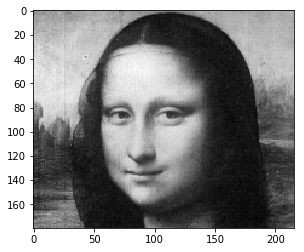

In [12]:
im=cv2.imread('monalisa.tif')
plt.imshow(im)

In [13]:
im.shape

(180, 216, 3)

In [14]:
img_flat = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) #To flatten image to 2D Matrix
img_flat.shape

(180, 216)

In [15]:
img_DCT=DCT(img_flat)

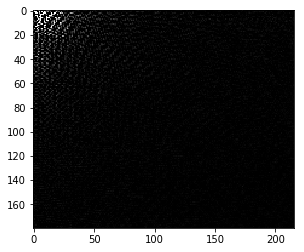

In [16]:
plt.imshow(img_DCT, cmap='gray', vmin=0, vmax=255)

As previously noted under Energy Compaction, the higher values are concentrated at the top left of the image.

In [17]:
img_fin=IDCT(img_DCT)

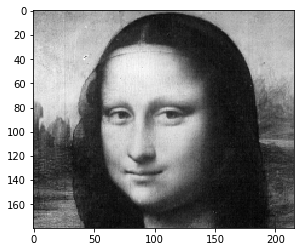

In [18]:
plt.imshow(img_fin, cmap='gray')

The original image is obtained from the IDCT.